### Dataset Link :  https://www.kaggle.com/jessemostipak/hotel-booking-demand

## **Hotel Booking Cancelation Prediction**

In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns

#visualizaton libraries
from matplotlib import  pyplot as plt
import seaborn as sns

#preprocessing  
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#common ML argorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#ensemble algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#neural network
from sklearn.neural_network import MLPClassifier

#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

#model evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score


In [ ]:
#importing dataset
df = pd.read_csv('hotel_bookings.csv')

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Exploratory Data Analysis**

In [ ]:

df.shape

(119390, 32)

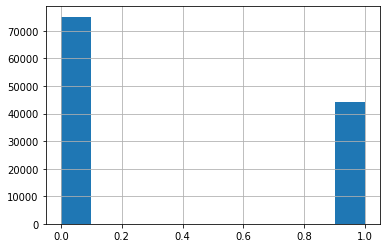

In [ ]:
df.is_canceled.hist()

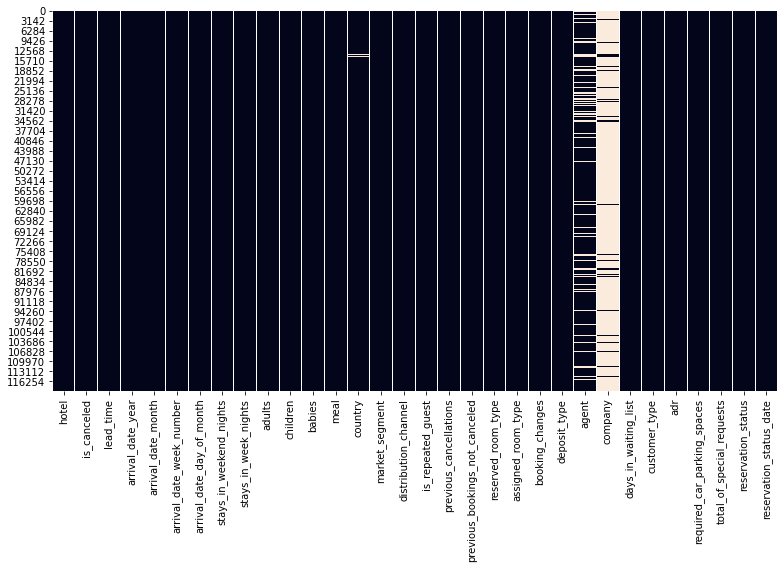

In [ ]:
plt.figure(figsize=(13,7))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#dropping missing and repetitive columns
df = df.drop(['company','agent','reservation_status'], axis=1)


In [ ]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
#filling missing values in countries for "Other"
df["country"].fillna("other country", inplace = True)

#assuming blank in children means 0 number of children
df['children'].fillna(0,inplace=True)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

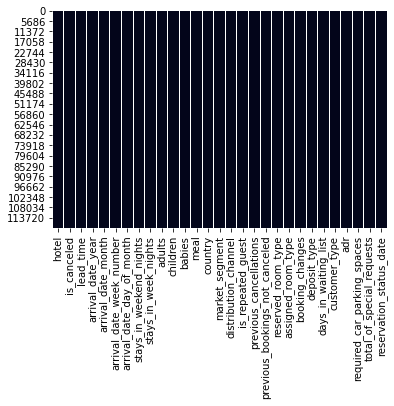

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
print(df.isnull().sum())

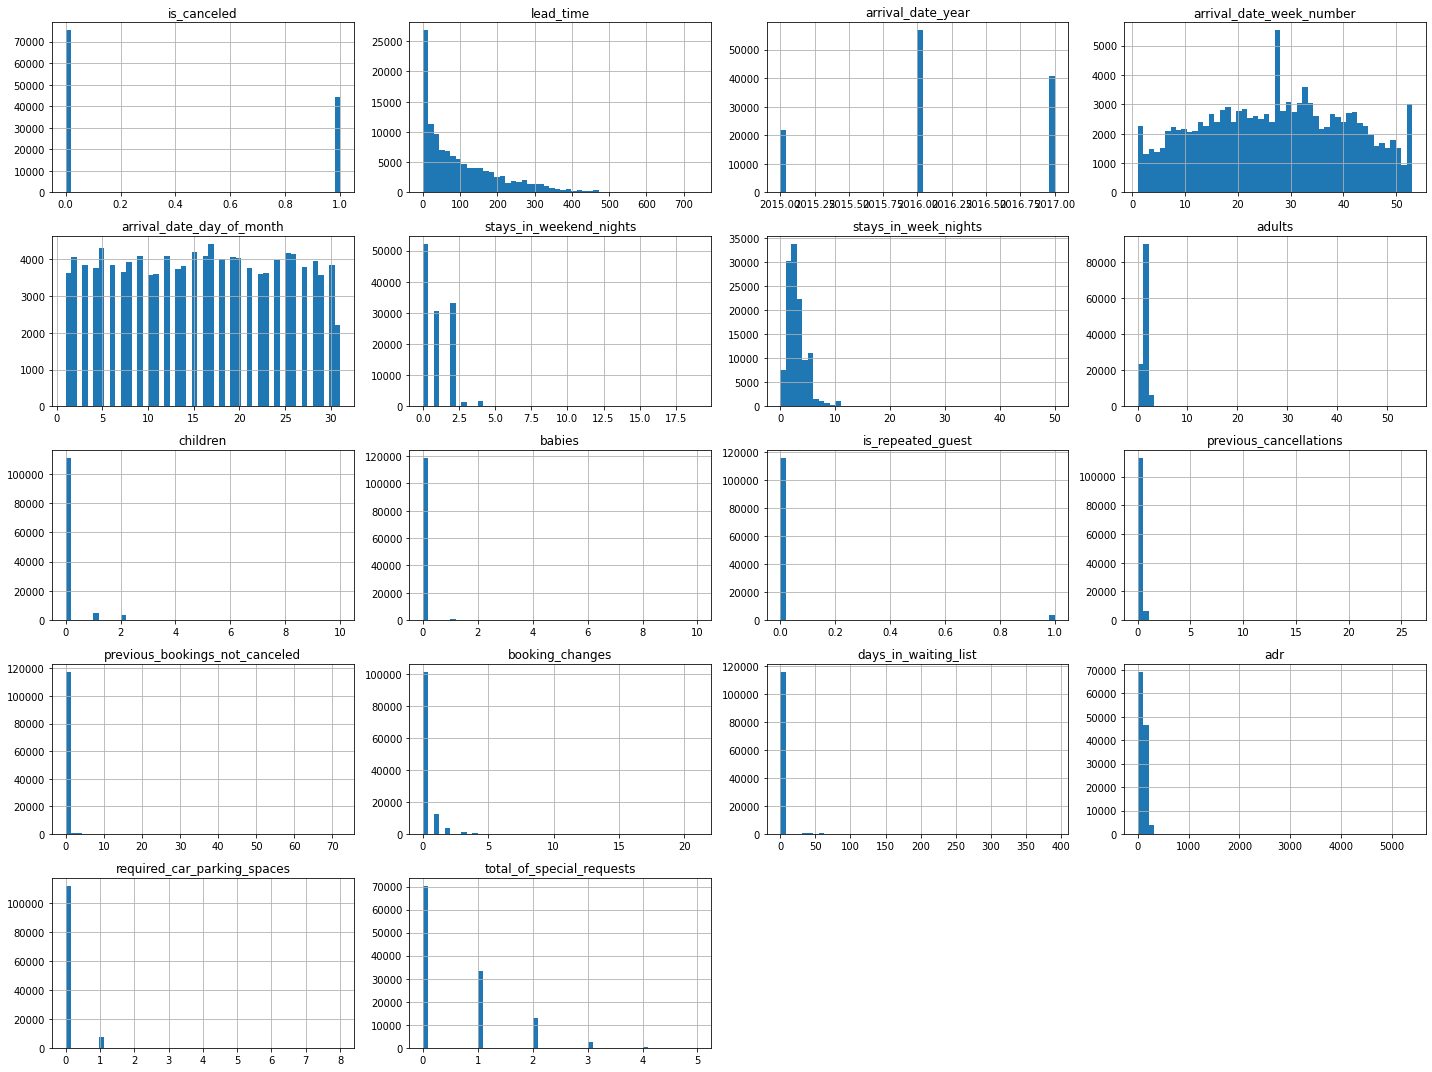

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

### **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Dropping Categorical Variables with zero variation
categorical_var = list(df.select_dtypes(include=object).columns)
zero_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)==1:
        zero_cardinality.append(column)
zero_cardinality

[]

In [ ]:
#Dropping Categorical Variables with Multiple Levels:
high_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)>100:
        high_cardinality.append(column)
print(high_cardinality)

#dropping columns with high cardinality
df = df.drop(high_cardinality, axis=1)


['country', 'reservation_status_date']


In [ ]:

#since this is a predictive model, past year values also does not matter. So, we will also drop the arrival_date_year column
df = df.drop('arrival_date_year', axis=1)

In [ ]:
df.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [ ]:
#dropping columns with very less corration with our target variable
df = df.drop(['arrival_date_week_number','children','arrival_date_day_of_month','stays_in_weekend_nights'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   babies                          119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   market_segment                  119390 non-null  object 
 9   distribution_channel            119390 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [ ]:

#Creating dummy variables to be used for all models except random forest and boosted tree model
df_all = pd.get_dummies(df,drop_first=True)

#Creating dummy variables to be used for random forest and boosted tree model only
df_tree = pd.get_dummies(df)


In [ ]:
df_all.shape

(119390, 65)

In [ ]:
df_tree.shape

(119390, 74)

##**Logistic Regression Model**

In [ ]:
#preparing features and labels
y = df_all['is_canceled'].values

X = df_all.drop(['is_canceled'], axis=1).values

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)



In [ ]:
#Scaling features variables
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(y_test, y_pred_lr)
matrix

array([[20895,  1629],
       [ 5418,  7875]])

In [ ]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.79      0.93      0.86     22524
           1       0.83      0.59      0.69     13293

    accuracy                           0.80     35817
   macro avg       0.81      0.76      0.77     35817
weighted avg       0.81      0.80      0.79     35817



In [ ]:
logmodel.coef_

array([[ 2.97647650e+00,  1.75592716e+00,  4.26520272e+00,
         8.74800991e-01, -4.75846682e-01,  2.04457357e+01,
        -5.76850043e+00, -6.66482936e+00, -3.60049196e-01,
         8.44218978e+00, -1.97075293e+01, -3.62424596e+00,
         4.16069137e-02,  3.98510387e-02,  1.71012167e-01,
         6.39559379e-02, -2.26847097e-02, -6.55905531e-02,
        -9.18333930e-02, -1.76205116e-01, -6.95133839e-02,
         1.74634952e-02,  6.40158432e-03, -1.03969693e-01,
         7.04559322e-01, -4.85547613e-02, -1.45321985e-02,
        -5.07799077e-01,  5.13068251e-01, -1.65448756e-01,
         1.55090804e-01,  1.01801121e-01, -6.26915184e-01,
         7.26090286e-01,  0.00000000e+00, -5.21799541e-01,
        -8.80972038e-01,  5.20391856e-02, -1.49972609e-02,
         8.18656286e-01,  1.67396443e+00,  1.20096681e+00,
         1.82648401e+00,  2.04153965e+00,  2.74136279e+00,
         1.97403041e+00, -2.39153944e-01,  1.43395025e+00,
        -8.18602612e-01, -1.32688454e+00, -1.32782453e+0

In [ ]:
#calculating ROC AUC score for logit model
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))

logit_roc_auc

0.7600471029953515

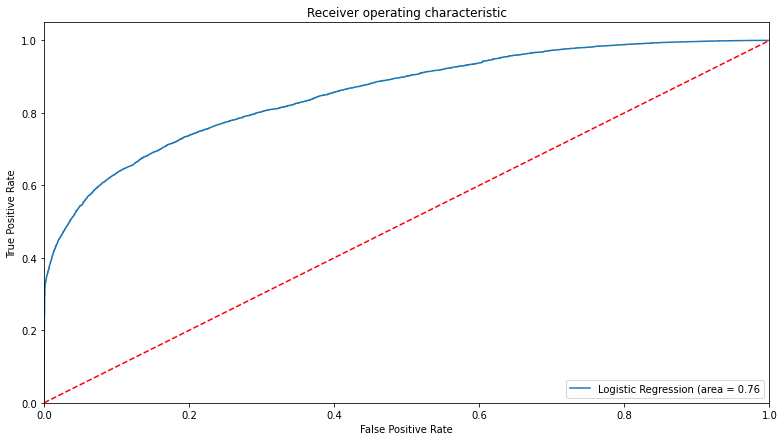

In [ ]:
#ROC AUC Curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(13, 7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##**KNN**

In [ ]:
#preparing features and labels

y = df_all['is_canceled'].values

X = df_all.drop(['is_canceled'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Scaling features variables

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
#KNN
#Determining optimal value of k
knn_score_list = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  rocauc_score = roc_auc_score(y_test,y_pred)
  knn_score_list.append(rocauc_score)



In [ ]:
sns.lineplot(x=range(1,20),y=knn_score_list)

In [ ]:
#determining exact value of k
optimal_k = knn_score_list.index(max(knn_score_list))+1
optimal_k

1

In [ ]:
#KNN
optimal_k = 10
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)

knn_y_pred[:20]

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
matrix = confusion_matrix(y_test, knn_y_pred)
matrix

array([[20581,  1943],
       [ 4531,  8762]])

In [ ]:
print("K-Nearest Neighbours Classifier\n",classification_report(y_test,knn_y_pred),"\n")

K-Nearest Neighbours Classifier
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     22524
           1       0.82      0.66      0.73     13293

    accuracy                           0.82     35817
   macro avg       0.82      0.79      0.80     35817
weighted avg       0.82      0.82      0.81     35817
 



In [ ]:
# Calculating ROC AUC score
knn_roc_auc = roc_auc_score(y_test,knn_y_pred)

knn_roc_auc

0.7864401846085206

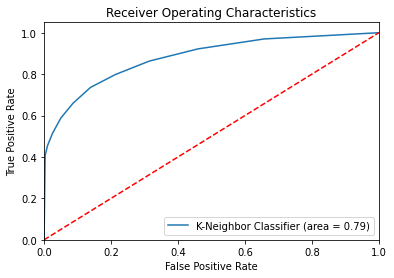

In [ ]:
# Presenting ROC AUC score curve

knn_fpr,knn_tpr,knn_thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(knn_fpr,knn_tpr,label="K-Neighbor Classifier (area = %0.2f)"%knn_roc_auc)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

##**Random Forest**

In [ ]:
#preparing features and labels

X = df_tree.drop(['is_canceled'], axis=1)
y = df_tree['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(max_depth=5,random_state=0)
rf.fit(X_train,y_train)

rf_y_pred = rf.predict(X_test)

rf_y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
matrix = confusion_matrix(y_test, rf_y_pred)
matrix

array([[22495,    29],
       [ 8372,  4921]])

In [ ]:
print("Random Forest Classifier\n",classification_report(y_test,rf_y_pred),"\n")


Random Forest Classifier
               precision    recall  f1-score   support

           0       0.73      1.00      0.84     22524
           1       0.99      0.37      0.54     13293

    accuracy                           0.77     35817
   macro avg       0.86      0.68      0.69     35817
weighted avg       0.83      0.77      0.73     35817
 



In [ ]:
# Calculating ROC AUC score
rf_roc_auc = roc_auc_score(y_test,rf_y_pred)

rf_roc_auc

0.6844536619250857

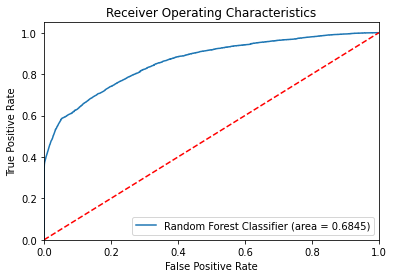

In [ ]:
# Presenting ROC AUC score curve

rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(rf_fpr,rf_tpr,label="Random Forest Classifier (area = %0.4f)"%rf_roc_auc)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

##**Boosted Tree**

In [ ]:
#preparing features and labels

X = df_tree.drop(['is_canceled'], axis=1)
y = df_tree['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# Boosted Tree Model
bt = AdaBoostClassifier(n_estimators=100)
bt.fit(X_train,y_train)

bt_y_pred = bt.predict(X_test)

bt_y_pred[:20]

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
#confusion matrix
matrix = confusion_matrix(y_test, bt_y_pred)
matrix

array([[20905,  1619],
       [ 5000,  8293]])

In [ ]:
#classification report
print("Boosted Tree Model\n",classification_report(y_test,bt_y_pred))

Boosted Tree Model
               precision    recall  f1-score   support

           0       0.81      0.93      0.86     22524
           1       0.84      0.62      0.71     13293

    accuracy                           0.82     35817
   macro avg       0.82      0.78      0.79     35817
weighted avg       0.82      0.82      0.81     35817



In [ ]:
# Calculating ROC AUC score
bt_roc_auc = roc_auc_score(y_test,bt_y_pred)

bt_roc_auc

0.7759916491793644

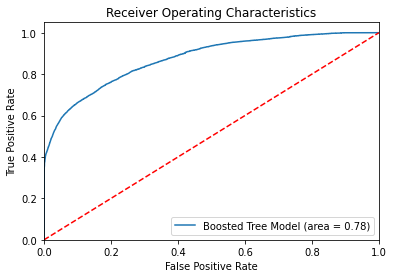

In [ ]:
# Presenting ROC AUC score curve

bt_fpr,bt_tpr,bt_thresholds = roc_curve(y_test,bt.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(bt_fpr,bt_tpr,label="Boosted Tree Model (area = %0.2f)"%bt_roc_auc)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

##**Naive Bayes Classifier**

In [ ]:
#preparing features and labels
X = df_all.drop(['is_canceled'], axis=1)
y = df_all['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
# Naive Bayes Model
cancels_nb = MultinomialNB(alpha=0.01)
cancels_nb.fit(X_train, y_train)

nb_y_pred = cancels_nb.predict(X_test)


In [ ]:
#confusion matrix
matrix = confusion_matrix(y_test, nb_y_pred)
matrix

array([[16288,  6236],
       [ 6371,  6922]])

In [ ]:
#classification report
print("Naive Bayes Model\n",classification_report(y_test,nb_y_pred))

Naive Bayes Model
               precision    recall  f1-score   support

           0       0.72      0.72      0.72     22524
           1       0.53      0.52      0.52     13293

    accuracy                           0.65     35817
   macro avg       0.62      0.62      0.62     35817
weighted avg       0.65      0.65      0.65     35817



In [ ]:
# Calculating ROC AUC score
nb_roc_auc = roc_auc_score(y_test,nb_y_pred)

nb_roc_auc

0.6219324778712931

In [ ]:
cancels_nb.n_features_

64

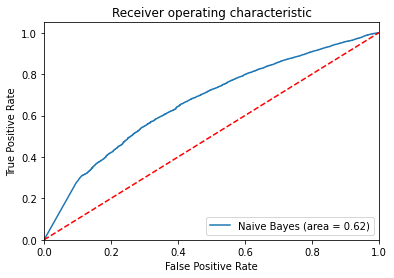

In [ ]:
#ROC AUC Curve
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, cancels_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##**Artificial Neural Network (ANN)**

In [ ]:
#preparing features and labels
X = df_all.drop(['is_canceled'], axis=1)
y = df_all['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


#Scaling features variables

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#identifying optimal number of nodes
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = []

for s in range(min_hidden_layer_size,max_hidden_layer_size, 5):
  MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic',solver='adam', random_state =1)
  scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring='accuracy')
  cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


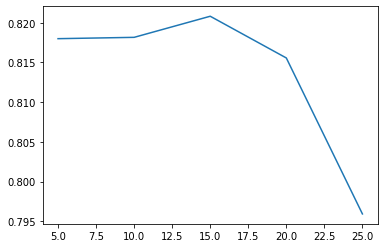

In [ ]:
sns.lineplot(x = range(min_hidden_layer_size,max_hidden_layer_size, 5),y=cv_scores)

In [ ]:
#determining exact value of hidden layers
optimal_nodes = (cv_scores.index(max(cv_scores))+1)*5             #multiplied by 5 since range is increased by 5

15

In [ ]:
#Artificial Neural Network (ANN)
#we will use 'adam' solver type since it works accurately for smaller data types
MLPC_model = MLPClassifier(hidden_layer_sizes= optimal_nodes,activation='logistic',solver='adam',random_state=1)

MLPC_model.fit(X_train,y_train)

mlpc_y_pred = MLPC_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#confusion matrix
matrix = confusion_matrix(y_test, mlpc_y_pred)
matrix

array([[20577,  1947],
       [ 4332,  8961]])

In [ ]:
#classification report
print("Artificial Neural Network(ANN)\n",classification_report(y_test,mlpc_y_pred))

Artificial Neural Network(ANN)
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     22524
           1       0.82      0.67      0.74     13293

    accuracy                           0.82     35817
   macro avg       0.82      0.79      0.80     35817
weighted avg       0.82      0.82      0.82     35817



In [ ]:
# Calculating ROC AUC score
mlpc_roc_auc = roc_auc_score(y_test,mlpc_y_pred)

mlpc_roc_auc

0.7938365329896512

##**Sequential Neural Network**

In [ ]:
#preparing features and labels
X = df_all.drop(['is_canceled'], axis=1)
y = df_all['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


#Scaling features variables

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(83573, 64)

In [ ]:
# Sequential Neural Network (with drop out and early stopping)
model = Sequential()

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [ ]:
#using early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

In [ ]:
#fitting model into training datasets
model.fit(x = X_train,
          y = y_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_test,y_test),verbose =1,
          callbacks = [early_stop]
          )

Epoch 1/100
653/653 [==============================] - 2s 2ms/step - loss: 0.5864 - val_loss: 0.4470
Epoch 2/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4678 - val_loss: 0.4259
Epoch 3/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4406 - val_loss: 0.4151
Epoch 4/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4269 - val_loss: 0.4071
Epoch 5/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4210 - val_loss: 0.4024
Epoch 6/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4170 - val_loss: 0.3984
Epoch 7/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4134 - val_loss: 0.3968
Epoch 8/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4079 - val_loss: 0.3945
Epoch 9/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4052 - val_loss: 0.3913
Epoch 10/100
653/653 [==============================] - 1s 2ms/step - loss: 0.4046 - val_lo

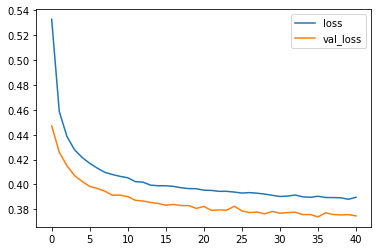

In [ ]:
#plotting training and validation losses
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
#confusion matrix
sq_y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test,sq_y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[20945  1579]
 [ 4629  8664]]


In [ ]:
#classification report
print(classification_report(y_test,sq_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     22524
           1       0.85      0.65      0.74     13293

    accuracy                           0.83     35817
   macro avg       0.83      0.79      0.80     35817
weighted avg       0.83      0.83      0.82     35817



In [ ]:
#ROC AUC Score
sq_roc_auc = roc_auc_score(y_test,sq_y_pred)

sq_roc_auc

0.7908343039372312